In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('features_10_sec.csv')

In [3]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000_1.wav,22064,0.342053,0.089037,0.124483,0.003146,1782.622682,116977.082472,2020.556328,84328.680518,...,69.972047,-2.870996,35.479566,0.306076,43.506837,-2.700369,58.693996,2.370232,48.047722,blues
1,blues.00000_2.wav,22064,0.366391,0.088113,0.135369,0.002848,1803.133844,181387.013868,2043.208033,90946.378997,...,37.156276,-0.946113,38.908409,-0.170837,44.038218,-2.291197,39.561969,1.508931,30.957496,blues
2,blues.00000_3.wav,22064,0.341613,0.088826,0.130891,0.002418,1767.406536,92117.458238,1944.426261,77565.158753,...,49.559095,-2.871220,34.696121,0.118136,36.728977,-3.230836,67.714219,0.995681,59.710692,blues
3,blues.00001_1.wav,22064,0.358000,0.090658,0.094405,0.002332,1364.273766,291346.764439,1842.030467,221553.848927,...,62.798435,0.497852,61.236266,0.039325,48.482973,-1.083576,54.454642,-0.112308,53.948946,blues
4,blues.00001_2.wav,22064,0.346125,0.100884,0.087959,0.002073,1581.277785,445452.088998,2125.234003,208450.714793,...,54.984588,0.114600,57.306570,-0.367247,48.318131,-2.646991,40.664638,1.118412,45.825510,blues


In [4]:
dataset = data[data['label'].isin(['blues', 'classical', 'jazz', 'metal', 'pop'])].drop(['filename','length'],axis=1)
dataset.iloc[:, :-15].head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var
0,0.342053,0.089037,0.124483,0.003146,1782.622682,116977.082472,2020.556328,84328.680518,3845.075667,8.328459e+05,...,-12.438343,88.565788,11.849509,65.871043,-8.861545,55.627559,9.301554,45.831500,-4.159669,41.106483
1,0.366391,0.088113,0.135369,0.002848,1803.133844,181387.013868,2043.208033,90946.378997,3903.829836,1.121840e+06,...,-12.655364,79.928542,12.149824,50.441130,-7.673405,69.389350,10.479906,48.726247,-4.333720,41.386650
2,0.341613,0.088826,0.130891,0.002418,1767.406536,92117.458238,1944.426261,77565.158753,3672.610197,7.164378e+05,...,-14.311970,74.174151,11.345278,68.401674,-10.862292,57.401111,8.887645,52.907380,-4.576091,40.318675
3,0.358000,0.090658,0.094405,0.002332,1364.273766,291346.764439,1842.030467,221553.848927,2976.303348,2.452152e+06,...,-5.247429,170.526753,10.499156,106.796248,-3.123052,73.653359,6.931743,87.721385,-1.881996,64.745123
4,0.346125,0.100884,0.087959,0.002073,1581.277785,445452.088998,2125.234003,208450.714793,3786.371459,3.232911e+06,...,-14.813420,147.978923,15.075876,104.607382,-8.104753,145.874261,9.272532,106.415909,-3.031386,72.321573


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn import preprocessing

In [6]:
encode = LabelEncoder().fit(dataset.iloc[:,-1])
y= LabelEncoder().fit_transform(dataset.iloc[:,-1])

In [7]:
scaler1 = MinMaxScaler().fit(np.array(dataset.iloc[:, :-15], dtype = float))
scaler2 = StandardScaler().fit(np.array(dataset.iloc[:, :-15], dtype = float))
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-15], dtype = float))
X.shape

(1497, 43)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1047, 43) (1047,)
Test set: (450, 43) (450,)


In [9]:
import tensorflow.keras as keras

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization

Using TensorFlow backend.


In [11]:
# defining our regression model 
n_cols = dataset.iloc[:, :-15].shape[1]
def regression_model_1():
    # structure of our model
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu',))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(5,activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=10, 
                                            verbose=1, 
                                            )
Callbacks = [earlystop, learning_rate_reduction]

In [13]:
#build the model
# model_1 = regression_model_1()

#fit the model
# model_1.fit(X_train,y_train, callbacks=Callbacks , validation_data=(X_test,y_test) ,epochs=100,batch_size=150)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1047 samples, validate on 450 samples
Epoch 1/100
1047/1047 [==============================] - 1s 1ms/step - loss: 1.7397 - accuracy: 0.3486 - val_loss: 1.4210 - val_accuracy: 0.6556
Epoch 2/100
1047/1047 [==============================] - 0s 70us/step - loss: 1.0113 - accuracy: 0.6055 - val_loss: 1.2101 - val_accuracy: 0.7533
Epoch 3/100
1047/1047 [==============================] - 0s 70us/step - loss: 0.7447 - accuracy: 0.7230 - val_loss: 1.0498 - val_accuracy: 0.8067
Epoch 4/100
1047/1047 [==============================] - 0s 76us/step - loss: 0.5889 - accuracy: 0.7985 - val_loss: 0.9158 - val_accuracy: 0.8467
Epoch 5/100
1047/1047 [==============================] - 0s 70us/step - loss: 0.4861 - accuracy: 0.8367 - val_loss: 0.8017 - val_accuracy: 0.8644
Epoch 6/100
1047/1047 [==============================] - 0s 80us/step - loss: 0.4279 - accuracy: 0.8577 

In [14]:
# model_1.save('Keras_reg_10sec_5.h5')

In [21]:
from keras.models import load_model
model = load_model('Keras_reg_10sec_5.h5')
predictions = model.predict_classes(X_test)
score = model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 95.56%


In [22]:
from sklearn.metrics import confusion_matrix

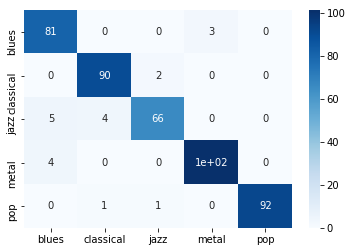

In [23]:
cf_matrix = confusion_matrix(y_test,predictions)
import seaborn as sns
%matplotlib inline
classes=['blues', 'classical', 'jazz', 'metal', 'pop']
sns.heatmap(cf_matrix, annot=True , cmap='Blues',xticklabels=classes,yticklabels=classes)

In [24]:
data_test = pd.read_csv('test_30_sec.csv')
dataset_test= data_test.drop(['filename','length'],axis=1)
X__test=scaler2.transform(np.array(dataset_test.iloc[:, :-15], dtype = float))
actual = encode.transform(dataset_test.iloc[:,-1])
pred = model.predict_classes(X__test)

In [25]:
# blues[0],classical[1],jazz[2],metal[3],pop[4]
print(actual)
print(pred)

[3 2 4 1 1 3 0 4 3 4 1 4 4 3 4 0 3 4 0 0 2 2 1 3 0 2 3 3 2 2 3 4 4 1]
[4 4 4 1 1 2 0 4 4 4 1 4 2 4 4 4 4 4 0 0 2 2 1 4 2 2 4 3 2 2 4 4 4 2]


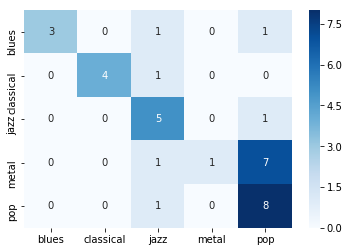

In [26]:
cf_matrix_test = confusion_matrix(actual,pred)
classes=['blues', 'classical','jazz', 'metal', 'pop']
sns.heatmap(cf_matrix_test, annot=True , cmap='Blues',xticklabels=classes,yticklabels=classes)